In [24]:
import xgboost as xgb
xgb.__version__

'1.6.1'

In [2]:
!pip install xgboost==1.6.1

     |████████████████████████████████| 192.9 MB 52 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
%matplotlib inline

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/MyDrive/10mo Semestre/ai_chari/dataset_01.csv")
df

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
0,0.544275,0.489766,0.478252,0.381462,0.544920,0.507024,0.544717,0.507232,0.545840,0.528162,...,0.506086,0.563004,0.522331,0.573575,0.504813,0.568157,0.508288,0.596934,0.357300,neutral
1,0.534347,0.493370,0.470491,0.378985,0.535169,0.508110,0.535000,0.508246,0.535752,0.524877,...,0.507017,0.552699,0.520293,0.564831,0.506325,0.560077,0.509084,0.590878,0.357876,neutral
2,0.533318,0.494122,0.467963,0.379832,0.534231,0.509847,0.533963,0.510075,0.534930,0.528483,...,0.508967,0.552772,0.523133,0.564357,0.507496,0.559269,0.510741,0.589321,0.357889,neutral
3,0.532908,0.495667,0.467501,0.380133,0.533887,0.510025,0.533832,0.510170,0.535072,0.527727,...,0.508982,0.552736,0.522589,0.563863,0.507534,0.559131,0.510484,0.588851,0.357857,neutral
4,0.532545,0.494852,0.468164,0.379853,0.533831,0.509942,0.533748,0.510049,0.535094,0.528073,...,0.508699,0.552740,0.522762,0.563882,0.507243,0.559186,0.510260,0.588814,0.358042,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.592283,0.485065,0.523655,0.339939,0.590946,0.505730,0.590502,0.506120,0.588611,0.529921,...,0.508719,0.613437,0.528026,0.631735,0.512042,0.624096,0.515017,0.675499,0.353467,ojo_izquierdo
4996,0.602635,0.480942,0.535009,0.333243,0.601282,0.502181,0.600842,0.502558,0.598943,0.526762,...,0.505377,0.624721,0.525037,0.643343,0.508581,0.635489,0.511652,0.688083,0.348406,ojo_izquierdo
4997,0.614582,0.477595,0.545290,0.328027,0.612743,0.499077,0.612232,0.499377,0.610056,0.524280,...,0.502405,0.636061,0.522673,0.654757,0.505929,0.646503,0.509062,0.700975,0.343798,ojo_izquierdo
4998,0.624917,0.474009,0.556321,0.322066,0.623276,0.495922,0.622766,0.496169,0.620531,0.520647,...,0.499248,0.646677,0.519183,0.666003,0.502711,0.657887,0.505944,0.714119,0.339014,ojo_izquierdo


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['184'])
df['184'] = le.transform(df['184'])

In [22]:
##Id for every label
print(le.inverse_transform([0,1,2,3,4]))

['boca_abierta' 'neutral' 'ojo_derecho' 'ojo_izquierdo' 'sonrisa']


In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
0,0.544275,0.489766,0.478252,0.381462,0.544920,0.507024,0.544717,0.507232,0.545840,0.528162,...,0.506086,0.563004,0.522331,0.573575,0.504813,0.568157,0.508288,0.596934,0.357300,1
1,0.534347,0.493370,0.470491,0.378985,0.535169,0.508110,0.535000,0.508246,0.535752,0.524877,...,0.507017,0.552699,0.520293,0.564831,0.506325,0.560077,0.509084,0.590878,0.357876,1
2,0.533318,0.494122,0.467963,0.379832,0.534231,0.509847,0.533963,0.510075,0.534930,0.528483,...,0.508967,0.552772,0.523133,0.564357,0.507496,0.559269,0.510741,0.589321,0.357889,1
3,0.532908,0.495667,0.467501,0.380133,0.533887,0.510025,0.533832,0.510170,0.535072,0.527727,...,0.508982,0.552736,0.522589,0.563863,0.507534,0.559131,0.510484,0.588851,0.357857,1
4,0.532545,0.494852,0.468164,0.379853,0.533831,0.509942,0.533748,0.510049,0.535094,0.528073,...,0.508699,0.552740,0.522762,0.563882,0.507243,0.559186,0.510260,0.588814,0.358042,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.592283,0.485065,0.523655,0.339939,0.590946,0.505730,0.590502,0.506120,0.588611,0.529921,...,0.508719,0.613437,0.528026,0.631735,0.512042,0.624096,0.515017,0.675499,0.353467,3
4996,0.602635,0.480942,0.535009,0.333243,0.601282,0.502181,0.600842,0.502558,0.598943,0.526762,...,0.505377,0.624721,0.525037,0.643343,0.508581,0.635489,0.511652,0.688083,0.348406,3
4997,0.614582,0.477595,0.545290,0.328027,0.612743,0.499077,0.612232,0.499377,0.610056,0.524280,...,0.502405,0.636061,0.522673,0.654757,0.505929,0.646503,0.509062,0.700975,0.343798,3
4998,0.624917,0.474009,0.556321,0.322066,0.623276,0.495922,0.622766,0.496169,0.620531,0.520647,...,0.499248,0.646677,0.519183,0.666003,0.502711,0.657887,0.505944,0.714119,0.339014,3


In [8]:
df.sample(frac=1)

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
1968,0.715742,0.527863,0.648140,0.409642,0.711280,0.548542,0.704874,0.604364,0.701636,0.628758,...,0.603479,0.725469,0.622336,0.738816,0.577608,0.728683,0.577603,0.779321,0.436186,0
1758,0.514785,0.571718,0.441368,0.444177,0.514613,0.591593,0.518217,0.667710,0.518665,0.684366,...,0.657989,0.544631,0.669527,0.550261,0.617380,0.542253,0.620188,0.584541,0.436058,0
3165,0.706736,0.616934,0.643150,0.470867,0.704517,0.624989,0.701094,0.649145,0.698021,0.672595,...,0.645696,0.727070,0.664471,0.747990,0.621902,0.741872,0.625363,0.787564,0.488455,4
3163,0.691214,0.615424,0.627615,0.468479,0.689398,0.623734,0.686267,0.648551,0.683529,0.672754,...,0.644625,0.713159,0.663968,0.734307,0.619093,0.728261,0.622823,0.770812,0.486465,4
4394,0.777766,0.329424,0.669197,0.184112,0.773512,0.361206,0.770961,0.433127,0.769539,0.470253,...,0.429716,0.803124,0.458287,0.816632,0.390822,0.800570,0.394331,0.873489,0.182667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2841,0.787319,0.677533,0.714444,0.531696,0.785011,0.692270,0.784765,0.692521,0.783325,0.713970,...,0.694165,0.802882,0.711995,0.815392,0.695633,0.808746,0.697748,0.856276,0.542701,1
1336,0.504179,0.649044,0.429482,0.487894,0.502990,0.668925,0.502939,0.668926,0.501771,0.693578,...,0.670716,0.527188,0.690871,0.544524,0.672484,0.536886,0.675540,0.589697,0.497022,2
2645,0.517571,0.597315,0.442575,0.477837,0.518090,0.613639,0.518085,0.613599,0.519150,0.634844,...,0.612950,0.539333,0.629946,0.551900,0.612876,0.546124,0.616188,0.575829,0.462732,1
3030,0.495497,0.537190,0.414089,0.416204,0.495957,0.546793,0.497330,0.571614,0.498655,0.595392,...,0.561607,0.529949,0.579468,0.546193,0.535582,0.540172,0.539535,0.559677,0.393457,4


In [9]:
display(df.info(), df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 185 entries, 0 to 184
dtypes: float64(184), int64(1)
memory usage: 7.1 MB


None

,count,mean,std,min,25%,50%,75%,max
0,5000.0,0.529314,0.121410,0.135405,0.496387,0.512589,0.569693,0.912420
1,5000.0,0.559875,0.095904,0.260173,0.499969,0.570127,0.646571,0.760318
2,5000.0,0.446316,0.123192,0.035051,0.415156,0.440213,0.478543,0.804739
3,5000.0,0.416702,0.098595,0.145206,0.372073,0.445495,0.489342,0.588832
4,5000.0,0.529411,0.119522,0.145289,0.496754,0.512203,0.569485,0.905986
...,...,...,...,...,...,...,...,...
180,5000.0,0.565263,0.115946,0.210532,0.532994,0.548575,0.606192,0.936622
181,5000.0,0.582197,0.091265,0.303010,0.517015,0.603196,0.661763,0.774305
182,5000.0,0.604392,0.125900,0.218041,0.569685,0.589193,0.656805,0.997882
183,5000.0,0.404529,0.107024,0.120360,0.350074,0.435527,0.490803,0.579168


In [10]:
df_X = df.drop(['184'], axis=1)
df_y = df['184']
display(df_X.head(), df_y.head())

,0,1,2,3,4,5,6,7,8,9,...,174,175,176,177,178,179,180,181,182,183
0,0.544275,0.489766,0.478252,0.381462,0.544920,0.507024,0.544717,0.507232,0.545840,0.528162,...,0.558468,0.506086,0.563004,0.522331,0.573575,0.504813,0.568157,0.508288,0.596934,0.357300
1,0.534347,0.493370,0.470491,0.378985,0.535169,0.508110,0.535000,0.508246,0.535752,0.524877,...,0.549437,0.507017,0.552699,0.520293,0.564831,0.506325,0.560077,0.509084,0.590878,0.357876
2,0.533318,0.494122,0.467963,0.379832,0.534231,0.509847,0.533963,0.510075,0.534930,0.528483,...,0.548586,0.508967,0.552772,0.523133,0.564357,0.507496,0.559269,0.510741,0.589321,0.357889
3,0.532908,0.495667,0.467501,0.380133,0.533887,0.510025,0.533832,0.510170,0.535072,0.527727,...,0.548626,0.508982,0.552736,0.522589,0.563863,0.507534,0.559131,0.510484,0.588851,0.357857
4,0.532545,0.494852,0.468164,0.379853,0.533831,0.509942,0.533748,0.510049,0.535094,0.528073,...,0.548479,0.508699,0.552740,0.522762,0.563882,0.507243,0.559186,0.510260,0.588814,0.358042


0    1
1    1
2    1
3    1
4    1
Name: 184, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, train_size=0.90)
display(y_train.head(), y_test.head())

442     1
4832    3
1863    0
3377    4
3110    4
Name: 184, dtype: int64

1607    0
602     4
4791    3
3761    2
4469    0
Name: 184, dtype: int64

In [13]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, train_size=0.80)

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
training_data = {'X_train':X_train,'Y_train':y_train,
                'X_val': X_validation,'Y_val':y_validation,
                'X_test': X_test,'Y_test':y_test}

**NO CORRER ESTO**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_jobs=None,random_state=27,
                       verbose=1)
clf.fit(training_data['X_train'], training_data['Y_train'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished


RandomForestClassifier(random_state=27, verbose=1)

In [ ]:
predicted_labels = clf.predict(training_data['X_test'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [ ]:
accuracy_score(training_data['Y_test'], predicted_labels)

1.0

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'      : range(100,500,50),
    'max_depth'         : [8, 9, 10, 11, 12],
    'max_features': ['auto'],
    'criterion' :['gini']
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch1 = GridSearchCV(estimator = clf, param_grid = params, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch1.fit(training_data['X_train'], training_data['Y_train'])

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=27, verbose=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [8, 9, 10, 11, 12],
                         'max_features': ['auto'],
                         'n_estimators': range(100, 500, 50)},
             scoring='f1_micro', verbose=10)

**YA PUEDES CORRER**

In [15]:
import xgboost as xgb
import matplotlib.pyplot as plt

def plot_compare(metrics,eval_results,epochs):
    for m in metrics:
        test_score = eval_results['val'][m]
        train_score = eval_results['train'][m]
        rang = range(0, epochs)
        plt.rcParams["figure.figsize"] = [6,6]
        plt.plot(rang, test_score,"c", label="Val")
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()

def fitXgb(sk_model, training_data=training_data,epochs=300):
    print('Fitting model...')
    sk_model.fit(training_data['X_train'], training_data['Y_train'])
    print('Fitting done!')
    train = xgb.DMatrix(training_data['X_train'], label=training_data['Y_train'])
    val = xgb.DMatrix(training_data['X_val'], label=training_data['Y_val'])
    params = sk_model.get_xgb_params()
    metrics = ['mlogloss','merror']
    params['eval_metric'] = metrics
    store = {}
    evallist = [(val, 'val'),(train,'train')]
    xgb_model = xgb.train(params, train, epochs, evallist,evals_result=store,verbose_eval=100)
    print('-- Model Report --')
    print('XGBoost Accuracy: '+str(accuracy_score(sk_model.predict(training_data['X_test']), training_data['Y_test'])))
    print('XGBoost F1-Score (Micro): '+str(f1_score(sk_model.predict(training_data['X_test']),training_data['Y_test'],average='micro')))
    plot_compare(metrics,store,epochs)
    features = [str(i) for i in range(183)]
    f, ax = plt.subplots(figsize=(10,5))
    #plot = sns.barplot(x=features, y=sk_model.feature_importances_)
    #ax.set_title('Feature Importance')
    #plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()

In [17]:
from xgboost.sklearn import XGBClassifier
#initial model
xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=1000,
                    max_depth=3,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=-1,
                    num_class=5, ###ACTUALIZAR NUMERO DE CLASES DE FORMA SEGUIDA
                    seed=27)



Fitting model...
Fitting done!


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:528: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning


[0]	val-mlogloss:1.54478	val-merror:0.28556	train-mlogloss:1.54218	train-merror:0.26278
[100]	val-mlogloss:0.45965	val-merror:0.11222	train-mlogloss:0.39587	train-merror:0.06861
[200]	val-mlogloss:0.26156	val-merror:0.05111	train-mlogloss:0.18963	train-merror:0.01694
[300]	val-mlogloss:0.16814	val-merror:0.02667	train-mlogloss:0.10166	train-merror:0.00278
[400]	val-mlogloss:0.11790	val-merror:0.01778	train-mlogloss:0.05831	train-merror:0.00083
[499]	val-mlogloss:0.08996	val-merror:0.01111	train-mlogloss:0.03643	train-merror:0.00000
-- Model Report --
XGBoost Accuracy: 0.994
XGBoost F1-Score (Micro): 0.994


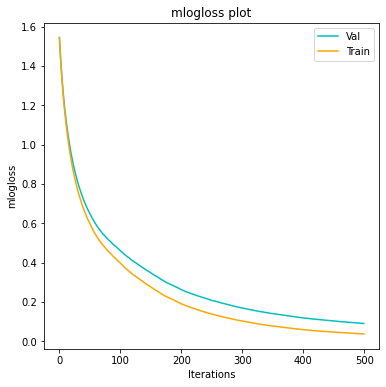

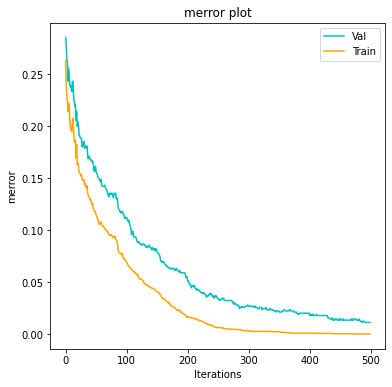

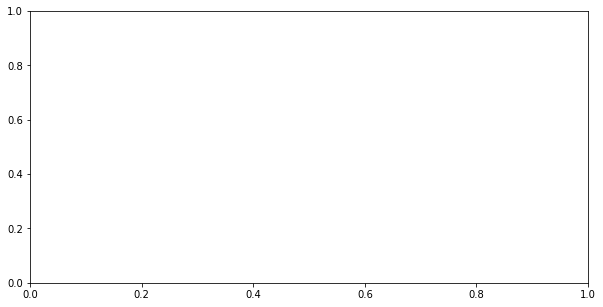

In [21]:
xgb2 = XGBClassifier(learning_rate=0.05,
                    n_estimators=2000,
                    max_depth=3,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=-1,
                    num_class=5, ###ACTUALIZAR NUMERO DE CLASES DE FORMA SEGUIDA
                    seed=27)
fitXgb(xgb2, training_data, epochs=500)


In [25]:
xgb2.save_model("model_2.json")

Fitting model...
Fitting done!


/usr/local/lib/python3.7/dist-packages/xgboost/core.py:528: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning


[0]	val-mlogloss:1.48223	val-merror:0.28556	train-mlogloss:1.47707	train-merror:0.26278
[100]	val-mlogloss:0.26010	val-merror:0.04556	train-mlogloss:0.18819	train-merror:0.01472
[200]	val-mlogloss:0.11888	val-merror:0.02111	train-mlogloss:0.05746	train-merror:0.00083
[299]	val-mlogloss:0.07273	val-merror:0.01222	train-mlogloss:0.02342	train-merror:0.00000
-- Model Report --
XGBoost Accuracy: 0.992
XGBoost F1-Score (Micro): 0.992


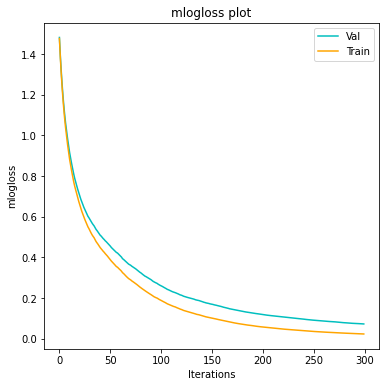

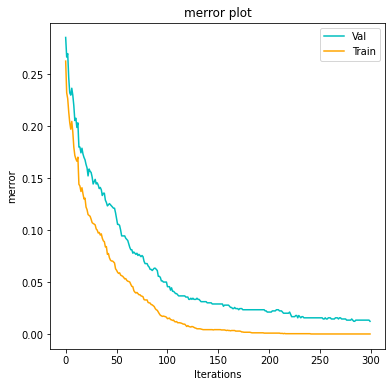

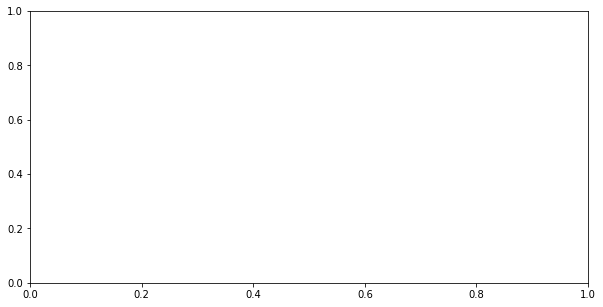

In [18]:
fitXgb(xgb1, training_data)

In [ ]:
def getTrainScores(gs):
    results = {}
    runs = 0
    for x,y in zip(list(gs.cv_results_['mean_test_score']), gs.cv_results_['params']):
        results[runs] = 'mean:' + str(x) + 'params' + str(y)
        runs += 1
    best = {'best_mean': gs.best_score_, "best_param":gs.best_params_}
    return results, best



In [ ]:
param_test1 = {
 'max_depth':range(3,8,2),
 'min_child_weight':range(1,5,2)
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch1 = GridSearchCV(estimator = xgb1, param_grid = param_test1, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch1.fit(X_train, y_train)



Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.1, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=3, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                         

In [ ]:
getTrainScores(gsearch1)

In [19]:
xgb1.best_ntree_limit

1000

In [20]:
xgb1.save_model("model_new.json")

In [ ]:
model_xgb_2 = xgb.Booster()
model_xgb_2.load_model("model_new.json")

In [ ]:
model_xgb_2.predict(xgb.DMatrix(X_test))

array([3., 3., 0., 2., 1., 3., 0., 2., 3., 1., 2., 0., 2., 2., 0., 2., 2.,
       1., 3., 0., 0., 2., 3., 2., 1., 3., 2., 0., 1., 1., 1., 2., 0., 3.,
       1., 0., 2., 1., 1., 3., 2., 0., 2., 3., 1., 3., 1., 2., 2., 0., 1.,
       2., 2., 3., 0., 2., 3., 0., 1., 0., 2., 1., 3., 0., 0., 3., 3., 2.,
       3., 1., 1., 2., 3., 1., 1., 1., 3., 0., 1., 1., 3., 3., 1., 0., 2.,
       3., 0., 2., 1., 3., 2., 0., 3., 1., 1., 1., 0., 1., 1., 2., 1., 1.,
       0., 0., 1., 1., 3., 2., 2., 1., 0., 3., 1., 3., 2., 1., 3., 2., 0.,
       0., 0., 3., 0., 0., 1., 3., 2., 0., 2., 0., 3., 1., 2., 0., 1., 0.,
       3., 2., 3., 2., 3., 0., 2., 3., 0., 2., 2., 2., 0., 2., 1., 3., 1.,
       1., 2., 0., 0., 1., 3., 2., 1., 0., 2., 1., 3., 3., 2., 2., 2., 0.,
       2., 2., 3., 1., 1., 3., 0., 1., 1., 0., 0., 2., 0., 0., 0., 0., 0.,
       2., 1., 2., 2., 3., 3., 1., 2., 0., 0., 2., 0., 2.], dtype=float32)

In [ ]:
xgb1.predict(X_test)

array([3, 3, 0, 2, 1, 3, 0, 2, 3, 1, 2, 0, 2, 2, 0, 2, 2, 1, 3, 0, 0, 2,
       3, 2, 1, 3, 2, 0, 1, 1, 1, 2, 0, 3, 1, 0, 2, 1, 1, 3, 2, 0, 2, 3,
       1, 3, 1, 2, 2, 0, 1, 2, 2, 3, 0, 2, 3, 0, 1, 0, 2, 1, 3, 0, 0, 3,
       3, 2, 3, 1, 1, 2, 3, 1, 1, 1, 3, 0, 1, 1, 3, 3, 1, 0, 2, 3, 0, 2,
       1, 3, 2, 0, 3, 1, 1, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 1, 3, 2, 2, 1,
       0, 3, 1, 3, 2, 1, 3, 2, 0, 0, 0, 3, 0, 0, 1, 3, 2, 0, 2, 0, 3, 1,
       2, 0, 1, 0, 3, 2, 3, 2, 3, 0, 2, 3, 0, 2, 2, 2, 0, 2, 1, 3, 1, 1,
       2, 0, 0, 1, 3, 2, 1, 0, 2, 1, 3, 3, 2, 2, 2, 0, 2, 2, 3, 1, 1, 3,
       0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 2, 3, 3, 1, 2, 0, 0, 2,
       0, 2], dtype=int32)

In [ ]:
import pickle

pickl = {'model': xgb1}
pickle.dump(pickl, open('model_file'+'.p','wb'))

In [ ]:
import pickle


In [ ]:
file_name = 'model_file.p'
with open(file_name,'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']
#input transformed values to make a prediction in FlaskAPI


In [ ]:
model.save_model("model.json")

In [ ]:
model_xgb_2 = xgb.Booster()
model_xgb_2.load_model("model.json")

In [ ]:
model.predict(X_test)

array([0, 0, 0, 2, 3, 0, 3, 2, 2, 2, 2, 1, 1, 0, 1, 1, 2, 3, 3, 2, 0, 0,
       3, 3, 0, 1, 3, 1, 2, 3, 2, 0, 3, 2, 1, 0, 1, 1, 2, 1, 2, 1, 3, 3,
       2, 0, 1, 0, 1, 0, 2, 0, 3, 0, 2, 3, 1, 2, 3, 3, 0, 0, 2, 3, 3, 2,
       1, 1, 2, 3, 3, 3, 3, 1, 0, 3, 0, 2, 0, 3, 2, 3, 0, 3, 2, 0, 1, 1,
       2, 1, 2, 2, 1, 3, 2, 2, 2, 1, 3, 1, 1, 0, 1, 3, 0, 2, 3, 1, 2, 1,
       3, 3, 2, 2, 0, 0, 3, 2, 3, 0, 1, 0, 3, 2, 1, 1, 1, 3, 0, 3, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 3, 2, 3, 1, 3, 0, 1, 1, 3, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 1, 1, 3, 2, 3, 3, 0, 3, 3, 3, 1, 2, 0, 0, 1, 2, 0, 3, 1,
       1, 1, 1, 0, 3, 0, 3, 1, 3, 2, 0, 1, 2, 3, 2, 0, 1, 1, 0, 0, 0, 1,
       0, 2])

In [ ]:
y_test.to_csv("y_test.csv",mode='a',index=False)


In [ ]:
import xgboost as xgb
xgb.__version__

'0.90'

In [ ]:
model.save_model('things.bin')

In [ ]:
!pip install catboost
!pip install ipywidgets

     |████████████████████████████████| 76.6 MB 61 kB/s 


In [ ]:
import catboost
from catboost import CatBoostClassifier, Pool, metrics, cv
print(catboost.__version__)

1.0.5


In [ ]:
model2 = xgb.XGBRegressor()
model2.load_model("things.bin")

In [ ]:
print(model)

XGBClassifier(colsample_bytree=0.8, max_depth=5, missing=nan, n_estimators=1000,
              nthread=4, num_class=4, objective='multi:softprob', seed=27,
              subsample=0.8)


In [ ]:
print(X_test)

NameError: ignored

In [ ]:
result = model.predict(X_test)
pd.DataFrame(result).to_csv("y_test01.csv",mode='a',index=False)

In [ ]:
model = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    task_type='GPU',
    verbose=20
)


In [ ]:
model.fit(
    X_train, y_train,
    eval_set=(X_validation, y_validation),
    #plot=True #Plot not necesary in result replication
)

Learning rate set to 0.1091
0:	learn: 1.1286964	test: 1.1337705	best: 1.1337705 (0)	total: 16.2ms	remaining: 16.2s
20:	learn: 0.1171706	test: 0.1313342	best: 0.1313342 (20)	total: 323ms	remaining: 15.1s
40:	learn: 0.0311825	test: 0.0410651	best: 0.0410651 (40)	total: 618ms	remaining: 14.5s
60:	learn: 0.0141356	test: 0.0216575	best: 0.0216575 (60)	total: 911ms	remaining: 14s
80:	learn: 0.0086119	test: 0.0143971	best: 0.0143971 (80)	total: 1.23s	remaining: 13.9s
100:	learn: 0.0059223	test: 0.0107979	best: 0.0107979 (100)	total: 1.52s	remaining: 13.6s
120:	learn: 0.0044301	test: 0.0084951	best: 0.0084951 (120)	total: 1.81s	remaining: 13.1s
140:	learn: 0.0036351	test: 0.0072651	best: 0.0072651 (140)	total: 2.1s	remaining: 12.8s
160:	learn: 0.0030678	test: 0.0063638	best: 0.0063638 (160)	total: 2.41s	remaining: 12.6s
180:	learn: 0.0026178	test: 0.0057650	best: 0.0057650 (180)	total: 2.71s	remaining: 12.2s
200:	learn: 0.0023285	test: 0.0053323	best: 0.0053323 (200)	total: 3.01s	remaining: 12

In [ ]:
cv_params = model.get_params()
cv_params.update({
    'loss_function': metrics.Logloss()
})
cv_data = cv(
    Pool(X_train, y_train),
    cv_params,
    #plot=True,
) 

Training on fold [0/3]


CatBoostError: ignored

In [ ]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']),
    cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
    np.argmax(cv_data['test-Accuracy-mean'])
))
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

In [ ]:
predictions = model.predict(X_test)
predictions_probs = model.predict_proba(X_test)
print(predictions[:10])
print(predictions_probs[:10])